In [1]:
import tensorflow as tf

a = tf.constant([1.0,2.0])
b = tf.constant([3.0,4.0])

result = a+b
print(result)

Tensor("add:0", shape=(2,), dtype=float32)


In [6]:
import tensorflow as tf

x = tf.constant([[1.0,2.0]])
w = tf.constant([[3.0],[4.0]])

y = tf.matmul(x,w)

with tf.Session() as sess:
    o=sess.run(y)
    print(o)

[[ 11.]]


In [7]:
#coding:utf=8
#两层简单神经网络(全连接)
import tensorflow as tf

#定一输入和参数

x=tf.constant([[0.7,0.5]])
w1=tf.Variable(tf.random_normal([2,3],stddev=1,mean=0,seed=1))
w2=tf.Variable(tf.random_normal([3,1],stddev=1,mean=0,seed=1))

#定义前向传播过程
a=tf.matmul(x,w1)
y=tf.matmul(a,w2)



#会话
with tf.Session() as sess:
    #初始化
    init=tf.global_variables_initializer()
    #运行
    sess.run(init)
    o=sess.run(y)
    print(o)

[[ 3.0904665]]


In [8]:
#coding:utf=8
#两层简单神经网络(全连接)
import tensorflow as tf

#定一输入和参数

x=tf.placeholder(tf.float32,shape=(1,2))
w1=tf.Variable(tf.random_normal([2,3],stddev=1,mean=0,seed=1))
w2=tf.Variable(tf.random_normal([3,1],stddev=1,mean=0,seed=1))

#定义前向传播过程
a=tf.matmul(x,w1)
y=tf.matmul(a,w2)



#会话
with tf.Session() as sess:
    #初始化
    init=tf.global_variables_initializer()
    #运行
    sess.run(init)
    o=sess.run(y,feed_dict={x:[[0.7,0.5]]})
    print(o)



[[ 3.0904665]]


In [9]:
#coding:utf=8
#两层简单神经网络(全连接)
import tensorflow as tf

#定一输入和参数

x=tf.placeholder(tf.float32,shape=(None,2))
w1=tf.Variable(tf.random_normal([2,3],stddev=1,mean=0,seed=1))
w2=tf.Variable(tf.random_normal([3,1],stddev=1,mean=0,seed=1))

#定义前向传播过程
a=tf.matmul(x,w1)
y=tf.matmul(a,w2)



#会话
with tf.Session() as sess:
    #初始化
    init=tf.global_variables_initializer()
    #运行
    sess.run(init)
    o=sess.run(y,feed_dict={x:[[0.7,0.5],[0.2,0.3],[0.3,0.4],[0.4,0.5]]})
    print("o:\n",o)
    print("w1:\n",sess.run(w1))
    print("w2:\n",sess.run(w2))


o:
 [[ 3.0904665 ]
 [ 1.2236414 ]
 [ 1.72707319]
 [ 2.23050475]]
w1:
 [[-0.81131822  1.48459876  0.06532937]
 [-2.4427042   0.0992484   0.59122431]]
w2:
 [[-0.81131822]
 [ 1.48459876]
 [ 0.06532937]]


In [10]:
#coding:utf=8
#两层简单神经网络(全连接)
import tensorflow as tf
import numpy as np

BATCH_SIZE = 8
SEED = 23455
learning_rate = 0.001
momentum=0.9
SETEPS=3000

#基于seed产生随机数
rng = np.random.RandomState(SEED)
#随机数返回32行2列的矩阵 表示32组 体积和重量 作为输入数据集
Xr = rng.rand(32,2)
#从X这个32行2列的矩阵中 取出咦行，判断如果小于1 给Y赋值1 反之0
#作为输入数据集的标签
Yr = [[int(x0+x1<1)] for (x0,x1) in Xr]

# print("rng:",rng)
# print("X:",X)
# print("Y:",Y)


x=tf.placeholder(tf.float32,shape=(None,2))
y_=tf.placeholder(tf.float32,shape=(None,1))

w1=tf.Variable(tf.random_normal([2,3],stddev=1,mean=0,seed=1))
w2=tf.Variable(tf.random_normal([3,1],stddev=1,mean=0,seed=1))

#定义前向传播过程
a=tf.matmul(x,w1)
y=tf.matmul(a,w2)


#定义损失函数
loss = tf.reduce_mean(tf.square(y-y_))
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
train_step = tf.train.MomentumOptimizer(learning_rate,momentum).minimize(loss)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)

#训练模型


with tf.Session() as sess:
    #初始化
    init=tf.global_variables_initializer()
    sess.run(init)
    #训练
    for i in range(SETEPS):
        start = (i*BATCH_SIZE) % 32
        end = start + BATCH_SIZE
        sess.run(train_step,feed_dict={x:Xr[start:end],y_:Yr[start:end]})
        if i % 500 == 0:
            loss_tmp = sess.run(loss,feed_dict={x:Xr,y_:Yr})
            print("after %5d step,loss = %lf"%(i,loss_tmp))

    print("\n")
    print("w1:\n",sess.run(w1))
    print("w2:\n",sess.run(w2))

after     0 step,loss = 5.209994
after   500 step,loss = 0.617026
after  1000 step,loss = 0.392288
after  1500 step,loss = 0.386432
after  2000 step,loss = 0.384254
after  2500 step,loss = 0.383676


w1:
 [[-0.40074915  1.02251101  1.00135279]
 [-2.13084817 -0.23977892  1.12739873]]
w2:
 [[-0.44574323]
 [ 1.04927158]
 [-0.53867602]]


In [14]:
#coding:utf=8

import tensorflow as tf
import numpy as np

BATCH_SIZE = 8
SEED = 23455
learning_rate = 0.001
momentum=0.9
SETEPS=20000

# 生成数据集
rdm = np.random.RandomState(SEED)
Xr = rdm.rand(32,2)
Yr = [[x1+x2+(rdm.rand()/10.0-0.05)] for (x1,x2) in Xr]


x=tf.placeholder(tf.float32,shape=(None,2))
y_=tf.placeholder(tf.float32,shape=(None,1))

w1=tf.Variable(tf.random_normal([2,1],stddev=1,mean=0,seed=1))



#定义前向传播过程
y=tf.matmul(x,w1)


#定义损失函数
loss = tf.reduce_mean(tf.square(y_-y))
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)
train_step = tf.train.MomentumOptimizer(learning_rate,momentum).minimize(loss)

#训练模型
with tf.Session() as sess:
    #初始化
    init=tf.global_variables_initializer()
    sess.run(init)

    #训练
    for i in range(SETEPS):
        start = (i*BATCH_SIZE) % 32
        end = start + BATCH_SIZE
        sess.run(train_step,feed_dict={x:Xr[start:end],y_:Yr[start:end]})
    #插入测试
        if i % 500 == 0:
            loss_tmp = sess.run(loss,feed_dict={x:Xr,y_:Yr})
            print("after %5d step,loss = %lf"%(i,loss_tmp))
    #训练结果
    print("\n")
    print("w1:\n",sess.run(w1))


after     0 step,loss = 0.655701
after   500 step,loss = 0.039273
after  1000 step,loss = 0.005775
after  1500 step,loss = 0.001331
after  2000 step,loss = 0.000741
after  2500 step,loss = 0.000663
after  3000 step,loss = 0.000653
after  3500 step,loss = 0.000651
after  4000 step,loss = 0.000651
after  4500 step,loss = 0.000651
after  5000 step,loss = 0.000651
after  5500 step,loss = 0.000651
after  6000 step,loss = 0.000651
after  6500 step,loss = 0.000651
after  7000 step,loss = 0.000651
after  7500 step,loss = 0.000651
after  8000 step,loss = 0.000651
after  8500 step,loss = 0.000651
after  9000 step,loss = 0.000651
after  9500 step,loss = 0.000651
after 10000 step,loss = 0.000651
after 10500 step,loss = 0.000651
after 11000 step,loss = 0.000651
after 11500 step,loss = 0.000651
after 12000 step,loss = 0.000651
after 12500 step,loss = 0.000651
after 13000 step,loss = 0.000651
after 13500 step,loss = 0.000651
after 14000 step,loss = 0.000651
after 14500 step,loss = 0.000651
after 1500

In [16]:
#coding:utf=8

import tensorflow as tf
import numpy as np

BATCH_SIZE = 8
SEED = 23455
learning_rate = 0.001
momentum=0.9
SETEPS=5000
COST=1
PROFIT=9
# 生成数据集
rdm = np.random.RandomState(SEED)
Xr = rdm.rand(32,2)
Yr = [[x1+x2+(rdm.rand()/10.0-0.05)] for (x1,x2) in Xr]


x=tf.placeholder(tf.float32,shape=(None,2))
y_=tf.placeholder(tf.float32,shape=(None,1))

w1=tf.Variable(tf.random_normal([2,1],stddev=1,mean=0,seed=1))



#定义前向传播过程
y=tf.matmul(x,w1)


#定义损失函数
loss = tf.reduce_mean(tf.square(y_-y))
loss = tf.reduce_sum(tf.where(tf.greater(y,y_),COST*(y-y_),PROFIT*(y_-y)))

train_step = tf.train.MomentumOptimizer(learning_rate,momentum).minimize(loss)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

#训练模型
with tf.Session() as sess:
    #初始化
    init=tf.global_variables_initializer()
    sess.run(init)

    #训练
    for i in range(SETEPS):
        start = (i*BATCH_SIZE) % 32
        end = start + BATCH_SIZE
        sess.run(train_step,feed_dict={x:Xr[start:end],y_:Yr[start:end]})
    #插入测试
        if i % 500 == 0:
            loss_tmp = sess.run(loss,feed_dict={x:Xr,y_:Yr})
            print("after %5d step,loss = %lf"%(i,loss_tmp))
            print("w1:\n",sess.run(w1))
    #训练结果
    print("\n")
    print("w1:\n",sess.run(w1))


after     0 step,loss = 178.825989
w1:
 [[-0.76299298]
 [ 1.50956583]]
after   500 step,loss = 1.930527
w1:
 [[ 1.02354431]
 [ 1.04633713]]
after  1000 step,loss = 1.921571
w1:
 [[ 1.01748443]
 [ 1.04064143]]
after  1500 step,loss = 1.926799
w1:
 [[ 1.02118051]
 [ 1.04723716]]
after  2000 step,loss = 1.914532
w1:
 [[ 1.01793861]
 [ 1.04127204]]
after  2500 step,loss = 1.919864
w1:
 [[ 1.02059376]
 [ 1.03904426]]
after  3000 step,loss = 1.928460
w1:
 [[ 1.02428985]
 [ 1.04563999]]
after  3500 step,loss = 1.918788
w1:
 [[ 1.01822996]
 [ 1.03994429]]
after  4000 step,loss = 1.925010
w1:
 [[ 1.02192605]
 [ 1.04654002]]
after  4500 step,loss = 1.920418
w1:
 [[ 1.02458119]
 [ 1.04431224]]


w1:
 [[ 1.02493167]
 [ 1.05021417]]


In [17]:
#coding:utf=8

import tensorflow as tf
import numpy as np

BATCH_SIZE = 8
SEED = 23455
learning_rate = 0.001
momentum=0.9
SETEPS=5000
COST=9
PROFIT=1
# 生成数据集
rdm = np.random.RandomState(SEED)
Xr = rdm.rand(32,2)
Yr = [[x1+x2+(rdm.rand()/10.0-0.05)] for (x1,x2) in Xr]


x=tf.placeholder(tf.float32,shape=(None,2))
y_=tf.placeholder(tf.float32,shape=(None,1))

w1=tf.Variable(tf.random_normal([2,1],stddev=1,mean=0,seed=1))



#定义前向传播过程
y=tf.matmul(x,w1)


#定义损失函数
loss = tf.reduce_mean(tf.square(y_-y))
loss = tf.reduce_sum(tf.where(tf.greater(y,y_),COST*(y-y_),PROFIT*(y_-y)))

train_step = tf.train.MomentumOptimizer(learning_rate,momentum).minimize(loss)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

#训练模型
with tf.Session() as sess:
    #初始化
    init=tf.global_variables_initializer()
    sess.run(init)

    #训练
    for i in range(SETEPS):
        start = (i*BATCH_SIZE) % 32
        end = start + BATCH_SIZE
        sess.run(train_step,feed_dict={x:Xr[start:end],y_:Yr[start:end]})
    #插入测试
        if i % 500 == 0:
            loss_tmp = sess.run(loss,feed_dict={x:Xr,y_:Yr})
            print("after %5d step,loss = %lf"%(i,loss_tmp))
            print("w1:",sess.run(w1))
            print("\n")
    #训练结果
    print("\n")
    print("w1:\n",sess.run(w1))


after     0 step,loss = 29.874481
w1: [[-0.80594873]
 [ 1.48737288]]


after   500 step,loss = 2.388141
w1: [[ 0.8732146 ]
 [ 1.00620401]]


after  1000 step,loss = 1.463943
w1: [[ 0.96580642]
 [ 0.96982086]]


after  1500 step,loss = 1.469110
w1: [[ 0.96454471]
 [ 0.96829468]]


after  2000 step,loss = 1.439148
w1: [[ 0.96024752]
 [ 0.97420847]]


after  2500 step,loss = 1.459067
w1: [[ 0.96100295]
 [ 0.96993423]]


after  3000 step,loss = 1.433331
w1: [[ 0.96541017]
 [ 0.97611594]]


after  3500 step,loss = 1.433593
w1: [[ 0.96414846]
 [ 0.97458977]]


after  4000 step,loss = 1.445256
w1: [[ 0.95985126]
 [ 0.98050356]]


after  4500 step,loss = 1.464110
w1: [[ 0.96364218]
 [ 0.96878934]]




w1:
 [[ 0.96267992]
 [ 0.97219694]]


In [29]:
#coding:utf=8

import tensorflow as tf
import numpy as np

w =tf.Variable(tf.constant(5,dtype=tf.float32))
loss = tf.square(w+1)

#训练模型
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

with tf.Session() as sess:
    #初始化
    init=tf.global_variables_initializer()
    sess.run(init)

    #训练
    for i in range(40):
        sess.run(train_step)
        #插入测试
        print("after %5d step  loss = %lf  w1=%lf"%(
                i,sess.run(loss),sess.run(w)
            ))
    #训练结果
    print("loss = %lf  w1=%lf"%(
                sess.run(loss),sess.run(w)
            ))

after     0 step  loss = 12.959999  w1=2.600000
after     1 step  loss = 4.665599  w1=1.160000
after     2 step  loss = 1.679616  w1=0.296000
after     3 step  loss = 0.604662  w1=-0.222400
after     4 step  loss = 0.217678  w1=-0.533440
after     5 step  loss = 0.078364  w1=-0.720064
after     6 step  loss = 0.028211  w1=-0.832038
after     7 step  loss = 0.010156  w1=-0.899223
after     8 step  loss = 0.003656  w1=-0.939534
after     9 step  loss = 0.001316  w1=-0.963720
after    10 step  loss = 0.000474  w1=-0.978232
after    11 step  loss = 0.000171  w1=-0.986939
after    12 step  loss = 0.000061  w1=-0.992164
after    13 step  loss = 0.000022  w1=-0.995298
after    14 step  loss = 0.000008  w1=-0.997179
after    15 step  loss = 0.000003  w1=-0.998307
after    16 step  loss = 0.000001  w1=-0.998984
after    17 step  loss = 0.000000  w1=-0.999391
after    18 step  loss = 0.000000  w1=-0.999634
after    19 step  loss = 0.000000  w1=-0.999781
after    20 step  loss = 0.000000  w1=-0.9

In [36]:
#coding:utf=8

import tensorflow as tf
import numpy as np

LEARNING_RATE_BASE        = 0.1
LEARNING_RATE_DECAY_STEPS = 1
LEARNING_RATE_DECAY_RATE  = 0.99

global_step = tf.Variable(0,trainable=False)

learning_rate = tf.train.exponential_decay(LEARNING_RATE_BASE,global_step,LEARNING_RATE_DECAY_STEPS,LEARNING_RATE_DECAY_RATE,staircase=True)


w =tf.Variable(tf.constant(5,dtype=tf.float32))
loss = tf.square(w+1)

#训练模型
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss,global_step=global_step)

with tf.Session() as sess:
    #初始化
    init=tf.global_variables_initializer()
    sess.run(init)

    #训练
    for i in range(40):
        sess.run(train_step)
        #插入测试
        print("after %5d step global_step=%lf loss=%lf  w1=%lf"
                %(i,sess.run(global_step),sess.run(loss),sess.run(w))
            )
    #训练结果
    print("\n loss = %lf  w1=%lf"%(
                sess.run(loss),sess.run(w)
            ))

after     0 step global_step=1.000000 loss=23.040001  w1=3.800000
after     1 step global_step=2.000000 loss=14.819419  w1=2.849600
after     2 step global_step=3.000000 loss=9.579033  w1=2.095001
after     3 step global_step=4.000000 loss=6.221960  w1=1.494386
after     4 step global_step=5.000000 loss=4.060895  w1=1.015166
after     5 step global_step=6.000000 loss=2.663051  w1=0.631886
after     6 step global_step=7.000000 loss=1.754587  w1=0.324608
after     7 step global_step=8.000000 loss=1.161402  w1=0.077684
after     8 step global_step=9.000000 loss=0.772287  w1=-0.121202
after     9 step global_step=10.000000 loss=0.515867  w1=-0.281761
after    10 step global_step=11.000000 loss=0.346128  w1=-0.411674
after    11 step global_step=12.000000 loss=0.233266  w1=-0.517024
after    12 step global_step=13.000000 loss=0.157891  w1=-0.602644
after    13 step global_step=14.000000 loss=0.107334  w1=-0.672382
after    14 step global_step=15.000000 loss=0.073276  w1=-0.729305
after    1

In [38]:
#coding:utf=8

import tensorflow as tf
import numpy as np



w1 = tf.Variable(0,dtype=tf.float32)
global_step = tf.Variable(0,trainable=False)

# 实现滑动平均类 衰减率0.99 当前轮数global_step
MOVING_AVERAGE_DECAY = 0.99
ema = tf.train.ExponentialMovingAverage(MOVING_AVERAGE_DECAY,global_step)
ema_op = ema.apply(tf.trainable_variables())

with tf.Session() as sess:
    #初始化
    init=tf.global_variables_initializer()
    sess.run(init)

    print("\n w1 = %lf  ema.w1=%lf"%(
              sess.run(w1),sess.run(ema.average(w1))
            ))

    sess.run(tf.assign(w1,1))
    sess.run(ema_op)

    print("\n w1 = %lf  ema.w1=%lf"%(
              sess.run(w1),sess.run(ema.average(w1))
            ))

    sess.run(tf.assign(global_step,100))
    sess.run(tf.assign(w1,10))
    sess.run(ema_op)

    print("\n w1 = %lf  ema.w1=%lf"%(
              sess.run(w1),sess.run(ema.average(w1))
            ))

    sess.run(ema_op)
    print("\n w1 = %lf  ema.w1=%lf"%(
          sess.run(w1),sess.run(ema.average(w1))
        ))

    sess.run(ema_op)
    print("\n w1 = %lf  ema.w1=%lf"%(
          sess.run(w1),sess.run(ema.average(w1))
        ))

    sess.run(ema_op)
    print("\n w1 = %lf  ema.w1=%lf"%(
          sess.run(w1),sess.run(ema.average(w1))
        ))




 w1 = 0.000000  ema.w1=0.000000

 w1 = 1.000000  ema.w1=0.900000

 w1 = 10.000000  ema.w1=1.644545

 w1 = 10.000000  ema.w1=2.328173

 w1 = 10.000000  ema.w1=2.955868

 w1 = 10.000000  ema.w1=3.532206


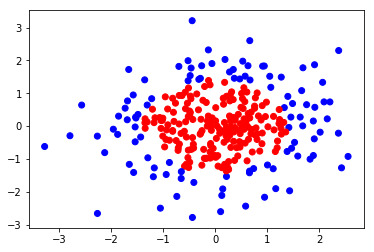

After     0 steps, loss is 0.623358
After  4000 steps, loss is 0.086425
After  8000 steps, loss is 0.067326


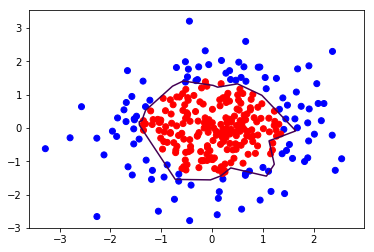

After     0 steps, loss is 1.304157
After  4000 steps, loss is 0.305729
After  8000 steps, loss is 0.218189


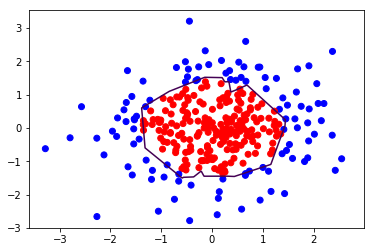

In [1]:
#coding:utf=8

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

BATCH_SIZE = 30
SEED = 233

rdm = np.random.RandomState(SEED)

Xr = rdm.randn(300,2)
Yr = [int(x0*x0 + x1*x1 < 2) for (x0,x1) in Xr]
Yrc = [['red' if Yri else 'blue'] for Yri in Yr]

Xr = np.vstack(Xr).reshape(-1,2)#整理为N行2列
Yr = np.vstack(Yr).reshape(-1,1)#整理为N行2列

# print(Xr)
# print(Yr)
# print(Yrc)

plt.scatter(Xr[:,0],Xr[:,1],c=np.squeeze(Yrc))
plt.show()



#定义神经网络的输入、参数和输出，定义前向传播过程
def get_weight(shape,regularizer):
    w = tf.Variable(tf.random_normal(shape),dtype=tf.float32)
    tf.add_to_collection('losses',tf.contrib.layers.l2_regularizer(regularizer)(w))
    return w

def get_bias(shape):
    b = tf.Variable(tf.constant(0.01,shape=shape))
    return b

Xnn = tf.placeholder(tf.float32,shape=(None,2))
Ynn = tf.placeholder(tf.float32,shape=(None,1))

w1 = get_weight([2,11],0.01)
b1 = get_bias([11])
y1 = tf.nn.relu(tf.matmul(Xnn,w1)+b1)

w2 = get_weight([11,1],0.01)
b2 = get_bias([1])
y2 = tf.nn.relu(tf.matmul(y1,w2)+b2)
Yo = y2

loss_mse = tf.reduce_mean(tf.square(Ynn-Yo))
loss_total =  loss_mse + tf.add_n(tf.get_collection('losses'))

def train1():
    #当前训练不包含正则化
    train_step = tf.train.AdamOptimizer(0.0001).minimize(loss_mse)

    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        for i in range(STEPS):
            start=(i*BATCH_SIZE)%300
            end = start + BATCH_SIZE
            sess.run(train_step,feed_dict={Xnn:Xr[start:end],Ynn:Yr[start:end]})

            #插入测试
            if i % 4000 == 0 :
                loss_mse_v = sess.run(loss_mse,feed_dict={Xnn:Xr,Ynn:Yr})
                print("After %5d steps, loss is %f"%(i,loss_mse_v))


        #画出训练分界线

        xx,yy  = np.mgrid[-3:3:0.01,-3:3:0.01]
        grid   = np.c_[xx.ravel(),yy.ravel()]
        probs1 = sess.run(Yo,feed_dict={Xnn:grid})
        probs1 = probs1.reshape(xx.shape)

        plt.scatter(Xr[:,0],Xr[:,1],c=np.squeeze(Yrc))
        plt.contour(xx,yy,probs1,levels=[.5])
        plt.show()



def train2():

    #当前训练包含正则化
    train_step = tf.train.AdamOptimizer(0.0001).minimize(loss_total)

    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        for i in range(STEPS):
            start=(i*BATCH_SIZE)%300
            end = start + BATCH_SIZE
            sess.run(train_step,feed_dict={Xnn:Xr[start:end],Ynn:Yr[start:end]})

            #插入测试
            if i % 4000 == 0 :
                loss_v = sess.run(loss_total,feed_dict={Xnn:Xr,Ynn:Yr})
                print("After %5d steps, loss is %f"%(i,loss_v))


        #画出训练分界线

        xx,yy  = np.mgrid[-3:3:0.01,-3:3:0.01]
        grid   = np.c_[xx.ravel(),yy.ravel()]
        probs1 = sess.run(Yo,feed_dict={Xnn:grid})
        probs1 = probs1.reshape(xx.shape)

        plt.scatter(Xr[:,0],Xr[:,1],c=np.squeeze(Yrc))
        plt.contour(xx,yy,probs1,levels=[.5])
        plt.show()





STEPS=8001
train1()
train2()



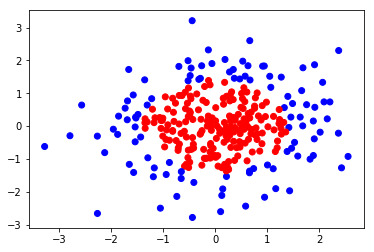

After     0 steps, loss is 5.143894


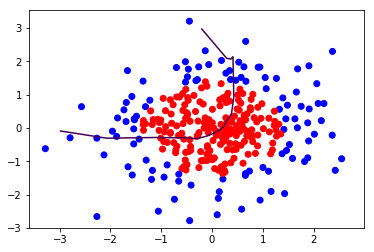

After  2000 steps, loss is 0.134207


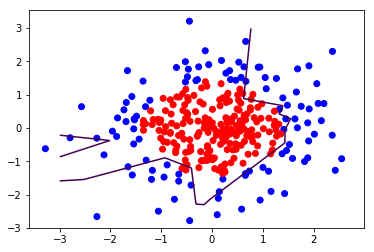

After  4000 steps, loss is 0.086921


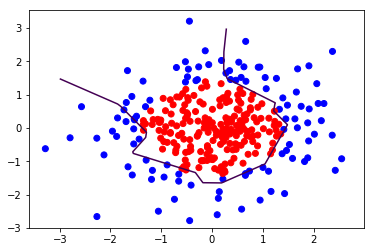

After  6000 steps, loss is 0.061932


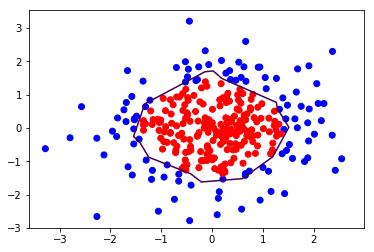

After  8000 steps, loss is 0.054176


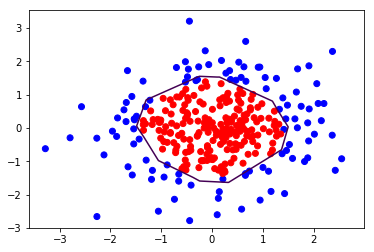

After 10000 steps, loss is 0.050941


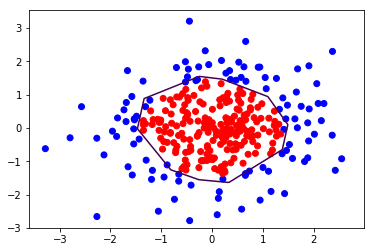

After 12000 steps, loss is 0.048996


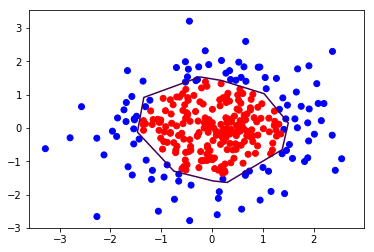

After 14000 steps, loss is 0.048002


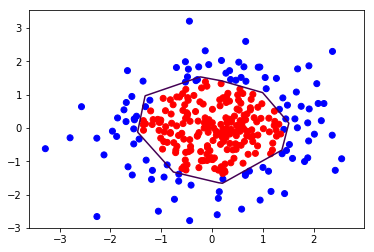

After 16000 steps, loss is 0.046965


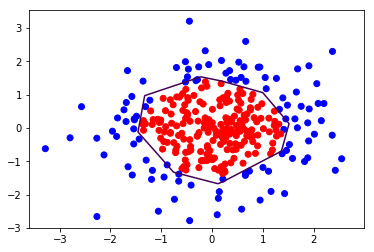

After 18000 steps, loss is 0.046614


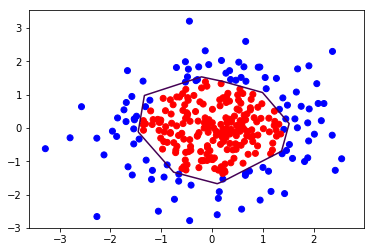

After 20000 steps, loss is 0.046277


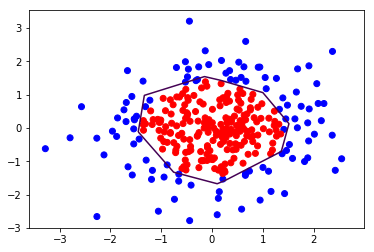

After 22000 steps, loss is 0.046135


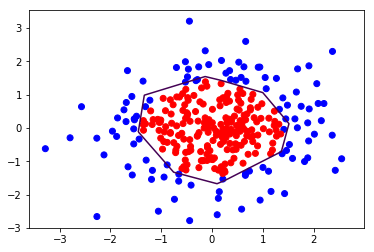

After 24000 steps, loss is 0.046059


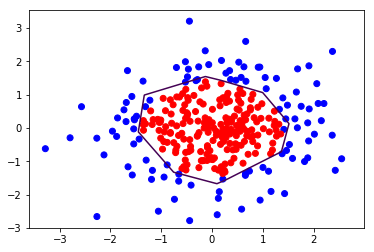

After 26000 steps, loss is 0.046015


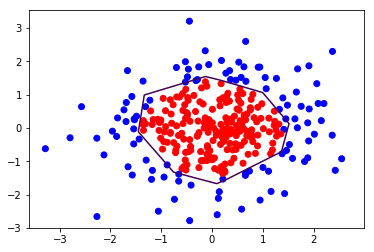

After 28000 steps, loss is 0.045990


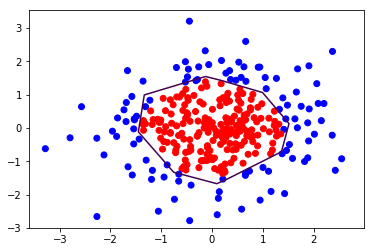

After 30000 steps, loss is 0.045974


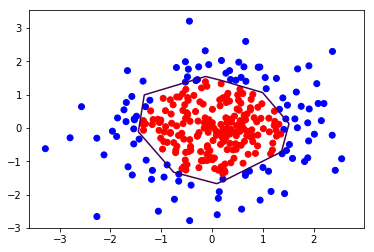

After 32000 steps, loss is 0.045962


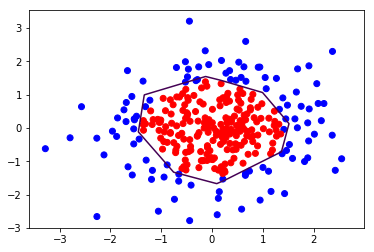

After 34000 steps, loss is 0.045956


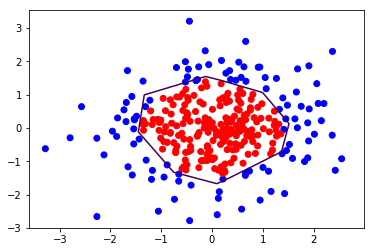

After 36000 steps, loss is 0.045948


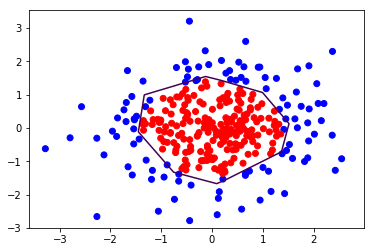

After 38000 steps, loss is 0.045948


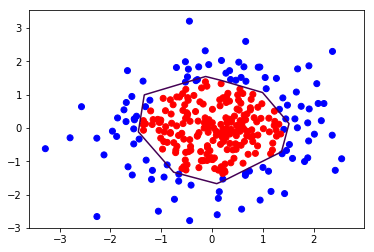

After 40000 steps, loss is 0.045948


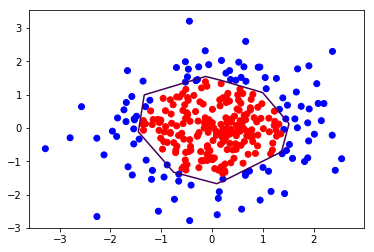

In [14]:
#coding:utf=8

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#定义神经网络的输入、参数和输出，定义前向传播过程
def get_weight(shape,regularizer):
    w = tf.Variable(tf.random_normal(shape),dtype=tf.float32)
    tf.add_to_collection('losses',tf.contrib.layers.l2_regularizer(regularizer)(w))
    return w

def get_bias(shape):
    b = tf.Variable(tf.constant(0.01,shape=shape))
    return b

def forward(x,regularizer):
    w1 = get_weight([2,11],0.01)
    b1 = get_bias([11])

    w2 = get_weight([11,1],0.01)
    b2 = get_bias([1])

    y1 = tf.nn.relu(tf.matmul(x,w1)+b1)
    y2 = tf.nn.relu(tf.matmul(y1,w2)+b2)

    Yo = y2

    return Yo

def backward():
    global_step = tf.Variable(0,trainable=False)
    Xi = tf.placeholder(tf.float32,shape=(None,2))
    Yi = tf.placeholder(tf.float32,shape=(None,1))
    REGULARIZER = 0.01
    Yo = forward(Xi,REGULARIZER)


    loss_mse = tf.reduce_mean(tf.square(Yo-Yi))
    # loss_cem = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=Y,labels=Yi))
    lossA = loss_mse
    # lossB = loss_cem
    lossC = loss_mse + tf.add_n(tf.get_collection('losses'))
    # lossD = loss_cem + tf.add_n(tf.get_collection('losses'))
    loss  = lossC


    LEARNING_RATE_BASE        = 0.1
    LEARNING_RATE_DECAY_STEPS = 1000
    LEARNING_RATE_DECAY_RATE  = 0.99
    learning_rate_exponential_decay = tf.train.exponential_decay(LEARNING_RATE_BASE,global_step,LEARNING_RATE_DECAY_STEPS,LEARNING_RATE_DECAY_RATE,staircase=True)

    learning_rateA = learning_rate_exponential_decay
    learning_rateB = 0.001
    learning_rate  = learning_rateB



    train_step_GradientDescentOptimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss,global_step=global_step)
    MOMENTUM=0.9
    train_step_MomentumOptimizer = tf.train.MomentumOptimizer(learning_rate,MOMENTUM).minimize(loss,global_step=global_step)
    train_step_AdamOptimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss,global_step=global_step)

    train_stepA = train_step_GradientDescentOptimizer
    train_stepB = train_step_MomentumOptimizer
    train_stepC = train_step_AdamOptimizer

    train_step  = train_step_AdamOptimizer



    # ema = tf.train.ExponentialMovingAverage(MOVING_AVERAGE_DECAY,global_step)
    # ema_op = ema.apply(tf.trainable_variables())
    # with tf.control_dependencies([train_step,ema_op]):
    #     train_op = tf.no_op(name='train')

    with tf.Session() as sess:
        #初始化
        init=tf.global_variables_initializer()
        sess.run(init)


        for i in range(STEPS):
            start=(i*BATCH_SIZE)%300
            end = start + BATCH_SIZE
            sess.run(train_step,feed_dict={Xi:Xr[start:end],Yi:Yr[start:end]})

            #插入测试
            if i % 2000 == 0 :
                loss_v = sess.run(loss_mse,feed_dict={Xi:Xr,Yi:Yr})
                print("After %5d steps, loss is %f"%(i,loss_v))

        #画出训练分界线

                xx,yy  = np.mgrid[-3:3:0.01,-3:3:0.01]
                grid   = np.c_[xx.ravel(),yy.ravel()]
                probs = sess.run(Yo,feed_dict={Xi:grid})
                probs = probs.reshape(xx.shape)
                plt.scatter(Xr[:,0],Xr[:,1],c=np.squeeze(Yrc))
                plt.contour(xx,yy,probs,levels=[.5])
                plt.show()



def generateds():

    rdm = np.random.RandomState(SEED)
    Xr  = rdm.randn(300,2)
    Yr  = [int(x0*x0 + x1*x1 < 2) for (x0,x1) in Xr]
    Yrc = [['red' if Yri else 'blue'] for Yri in Yr]
    Xr  = np.vstack(Xr).reshape(-1,2)#整理为N行2列
    Yr  = np.vstack(Yr).reshape(-1,1)#整理为N行1列

    return Xr,Yr,Yrc

if __name__ == '__main__':

    BATCH_SIZE = 30
    SEED       = 233
    STEPS      = 40001

    Xr,Yr,Yrc = generateds()

    plt.scatter(Xr[:,0],Xr[:,1],c=np.squeeze(Yrc))
    plt.show()

    backward()